<a href="https://colab.research.google.com/github/afbassi8/Data-Science-projects/blob/main/Bolonha_%5BITA%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

###<center>Análise dos Dados do Airbnb - **Bolonha - Itália**

<center><img width="50%" src="https://github.com/afbassi8/Data-Science-projects/blob/main/fonte-de-netuno-em-bolonha_469558-41358.webp?raw=true"></center>


**Bolonha** é uma cidade italiana, capital da *Emilia-Romagna*, **fundada cerca de 500 anos antes de Cristo**. Apresenta uma bela arquitetura, com construções antigas e famosas, como a fonte de Netuno construída no século XVI. 

Hoje é uma cidade com mais de 390 mil habitantes, ficando entre as 10 mais populosas da Itália. É conhecida como uma cidade cosmopolita e a universidade de Bolonha é a mais antiga da Europa, fundada em 1088. Dentre as cidades italianas é tida como **uma das melhores para morar por proporcionar grande qualidade de vida**.

A cidade é procurada por muitos turistas por sua **beleza arquitetônica, história antiquíssima e excelente gastronomia**. Também é destino para estudantes da própria Itália e de vários países do mundo. 

Uma das formas de se hospedar em Bolonha, e passar dias bem agradáveis, é encontrar o imóvel ideal para você dentre as inúmeras opções no Airbnb, uma Startup fundada há pouco mais de 10 anos e que já ***hospedou mais de 300 milhões de pessoas no mundo***.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste breve estudo mostraremos quais os tipos de imóveis disponíveis na cidade através do Airbnb, suas quantidades, preços médios, qual a região mais cara e como os imóveis estão distribuídos no mapa da cidade.**

## Obtenção dos Dados


In [ ]:
# Importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
!pip install gmaps
import gmaps 
import gmaps.datasets 

In [75]:
# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv", index_col = "id")

## Análise dos Dados


O Airbnb diponibiliza dois tipos de base de dados: resumida e completa. Para este estudo usaremos a base resumida, que atenderá perfeitamente ao propósito sem a necessidade de processar uma quantidade bem maior de dados.

As variáveis disponíveis na base de dados resumida são estas:



**Dicionário das variáveis**

* `id`: número identificador do imóvel
* `name`: nome da propriedade anunciada
* `host_id`: número de id do proprietário (anfitrião) da propriedade
* `host_name`: nome do anfitrião
* `neighbourhood_group`: *coluna sem valores válidos
* `neighbourhood`: nome do bairro da propriedade anunciada
* `latitude`: coordenada da latitude da propriedade
* `longitude`: coordenada da longitude da propriedade
* `room_type`: tipo de quarto que é oferecido
* `price`: preço para alugar o imóvel
* `minimum_nights`: quantidade mínima de noites para reservar
* `number_of_reviews`: número de reviews que a propriedade possui
* `last_review`: data do último review
* `reviews_per_month`: quantidade de reviews por mês
* `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião
* `availability_365`: número de dias de disponibilidade dentro de 365 dias
* `licence`: leis, regras e licenciamento



Com os dados carregados, podemos listar as primeiras 5 entradas (linhas) e conhecer quais tipos de informações teremos para trabalhar.

In [76]:
# Exibindo as 5 primeiras entradas do DataFrame
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
42196,50 sm Studio in the historic centre,184487,Carlo,NaN,Santo Stefano,44.48507,11.34786,Entire home/apt,71,3,195,2022-07-26,1.34,1,235,16,NaN
46352,A room in Pasolini's house,467810,Eleonora,NaN,Porto - Saragozza,44.49168,11.33514,Private room,31,1,331,2022-08-28,2.27,2,296,51,NaN
85368,Garden House Bologna,467675,Anna Maria,NaN,Santo Stefano,44.47834,11.35672,Entire home/apt,120,2,40,2019-11-03,0.31,1,351,0,NaN
125518,"quiet room, close to bus stop.",623988,Gabriella,NaN,Porto - Saragozza,44.47665,11.28085,Entire home/apt,75,7,21,2017-05-26,0.16,1,330,0,NaN
145779,SINGLE ROOM,705535,Valerio,NaN,Porto - Saragozza,44.49306,11.33786,Private room,70,7,71,2022-04-30,0.53,9,225,6,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos agora descobrir o tamanho do nosso banco de dados, ou seja, quantas entradas temos para cada variável e os tipos dos dados.

In [77]:
# Identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

# Verificar os tipos de variáveis
display(df.dtypes)

Variáveis:	 17
Entradas:	 3895


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma etapa importante da análise exploratória é identificar dados ausentes ou nulos e avaliar seu percentual com relação ao total de dados.

In [78]:
# Calculando % de dados nulos e apresentando as variáveis em ordem decrescente
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.940950
reviews_per_month                 0.108344
last_review                       0.108344
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
name                              0.000000
host_id                           0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
price                             0.000000
dtype: float64

Realizado o cálculo do percentual de dados nulos, verificamos que as variáveis *neighbourhood_group* e *licence* particamente não têm dados válidos. Já as variávies *reviews_per_month* e *last_review* possuem cada uma em torno de 10% de entradas nulas. Nenhuma dessas variáveis será objeto específico desse estudo. Entretanto, caso fóssemos usá-las, seria necessario aplicar algumas técnicas para tratativa ou até mesmo concluir que a base é insuficiente no caso das variáveis com grande quantidade de dados nulos. 

**Todas as demais variáveis possuem 100% de entradas válidas** e não haverá prejuízo nas análises estatísticas que vamos desenvolver.

### **Q3. Quais os valores estatísticos básicos das variáveis?** 

Uma forma simples e rápida de conhecer estatisticamente a base de dados é obter informações básicas como média, mediana, máximos, mínimos e quartis. O comando *describe* executa esses cálculos de uma só vez.
Oberservar atentamente tais valores é o início de uma boa análise.

In [79]:
# Obtenção dos principais dados estatísticos de todas as variáveis
df.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.895000e+03,0.0,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3473.000000,3895.000000,3895.000000,3895.000000
mean,1.381718e+08,NaN,44.497066,11.344666,152.091913,2.797946,44.454942,1.493075,9.070347,138.186906,12.742490
std,1.333163e+08,NaN,0.013016,0.023145,549.596170,10.886160,76.017156,1.677773,20.682442,121.586472,18.687196
min,3.846800e+04,NaN,44.423600,11.223420,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.494923e+07,NaN,44.491345,11.336720,65.000000,1.000000,4.000000,0.340000,1.000000,31.000000,0.000000
50%,9.729894e+07,NaN,44.496670,11.345220,91.000000,2.000000,16.000000,0.960000,2.000000,100.000000,5.000000
75%,2.253562e+08,NaN,44.502710,11.354360,138.000000,2.000000,50.500000,2.000000,5.000000,254.000000,17.000000
max,4.792220e+08,NaN,44.572280,11.443290,15960.000000,365.000000,833.000000,14.360000,107.000000,365.000000,158.000000


**Análise dos dados estatísticos básicos**

**Variável *PRICE***:
* O preço médio (152.09) está maior que o 3° quartil (138.0), indicando a possibilidade de outliers distorcendo os dados.
* O preço máximo (15960.0) é discrepante com relação aos demais dados estatísticos desta variável, certamente é um outlier.
* O preço mínimo (9.0) é aceitável. Em algumas bases do Airbnb encontramos preço mínimo igual a zero, o que certamente seria um dado sem sentido.


**Variável *MINIMUM_NIGHTS***:
* Como esta variável representa a quantidade mínima de noites para locação, não faz sentido o valor máximo apresentado (365.0). Não é comum o perfil de locação em longo prazo na plataforma Airbnb.
* A média (2.7), a mediana (2.0) e o 3° quartil (2.0) reforçam majoritariamente o perfil de locação para curtas temporadas, comportamento típico para turismo ou viagens a negócio.


**Variáveis *LATITUDE e LONGITUDE***:
* A estatística básica dessas variáveis mostra pouca dispersão dos dados. O que é um bom sinal uma vez que espera-se pequena variação por se tartarem de coordenadas geográficas de uma pequena região do globo terrestre. Além disso, é possível obervar pelos valores máximo e mínimo que não há entrada de dados absurdos, além do limite de coordenadas (0° a 90° norte-sul / 0° a 180° leste-oeste).


**Variável *CALCULATED_HOST_LISTINGS_COUNT***:
* O valor máximo (107.0) indica que existe um anfitrião na cidade com 107 imóveis anunciados. Seria interessante conhecer o nome deste anfitrião de destaque. Faremos isto adiante.

**Variável *AVAILABILITY_365***:
* O valor mímino (0.0) chama a atenção, pois indica que existe imóvel que não ficou disponível no período de um ano.

Pela análise de estatística básica ficou evidente que **temos dados discrepantes (outliers) e dados aparentemente incoerentes na base** e que precisamos tratá-los.

In [80]:
#Localizando o nome do anfitrião que possui 107 imóveis listados (variável "calculated_host_listings_count" = 107).
df.loc[df['calculated_host_listings_count'] == 107].host_name

id
50299256              Wonderful Italy
50910546              Wonderful Italy
50928144              Wonderful Italy
50928146              Wonderful Italy
50928149              Wonderful Italy
                           ...       
702054818124767587    Wonderful Italy
703993017819787887    Wonderful Italy
704008890678462376    Wonderful Italy
707128784640035255    Wonderful Italy
714203534968228278    Wonderful Italy
Name: host_name, Length: 107, dtype: object

Através do código acima identificamos que o anfitrião de destaque com 107 imóveis listados em Bolonha tem o nome de **Wonderful Italy**. Pesquisando sobre esse anfitrião descobrimos que trata-se de uma empresa Italiana que visa identificar imóveis de destaque no país e fazer a sublocação através do Airbnb.

### **Q4. Qual a distribuição das variáveis?** 

Usando o histograma podemos observar como os dados estão distribuídos em cada variável.

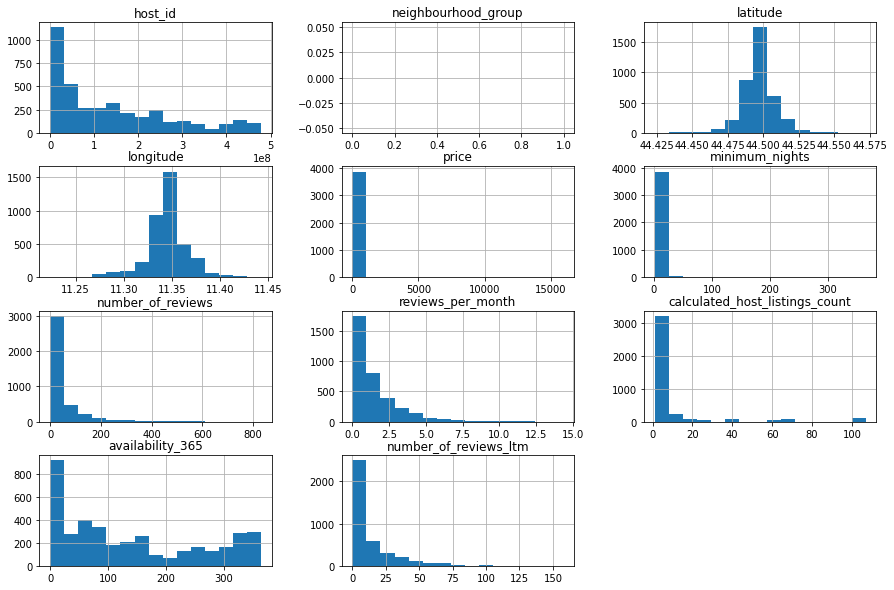

In [81]:
# Plotar o histograma das variáveis numéricas
df.hist(bins= 15, figsize=(15,10));

**Distribuição no histograma**

**Variáveis *PRICE e MINIMUM_NIGHTS***:

* Observando os histogramas notamos distorções geradas por valores discrepantes. Vejamos, novamente, as variáveis *price* e *minimum_nights*, em cada uma delas aparece uma coluna com valores concentrados de 0 à 1000 e 0 à 25, respectivamente, enquanto os valores acima dessas faixas mal podem ser vistos nos gráficos. 


**Variável *AVAILABILITY_365***:
* Agora com o histograma é possível observar que um grande número de imóveis (+ 800) tiveram disponibilidade igual ou menor que 25 dias no período de um ano.

### **Q5. Existem *outliers* no dados?**

Conforme análise feita anteriormente, há outliers nos dados. Vamos gerar os boxplots para melhor visualização dos outliers.

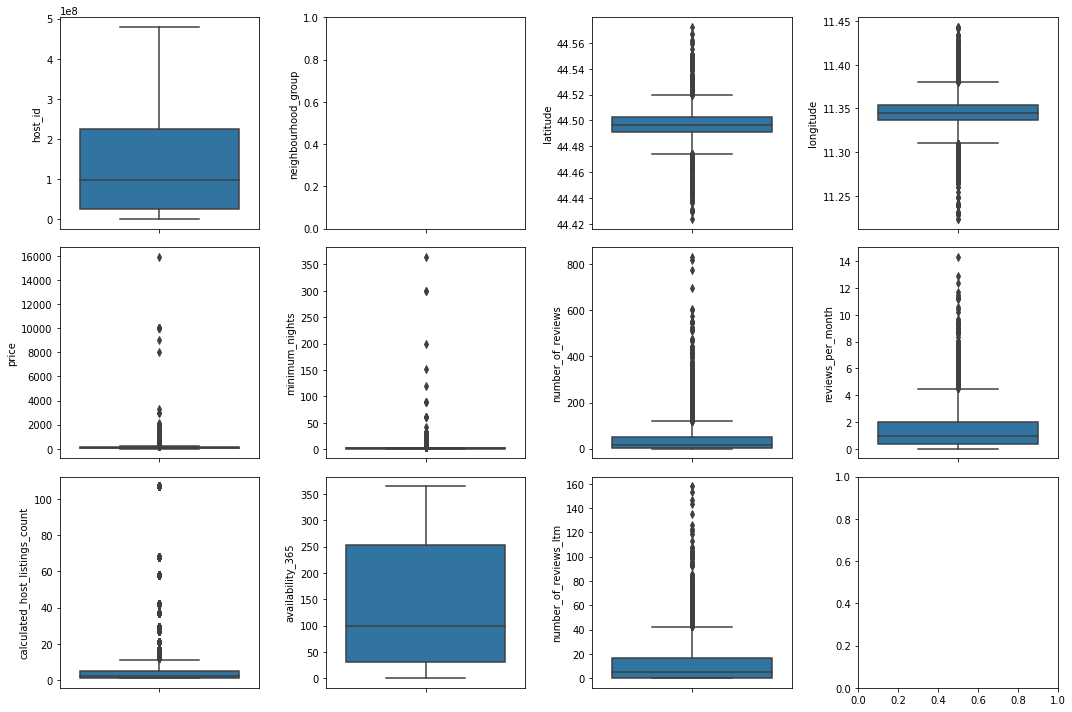

In [82]:
# Gerando boxplot para todas as variávies
var_num = []
for i in df.columns[0:18].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            var_num.append(i)
     
plt.rcParams["figure.figsize"] = [15.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 4) #5 linhas e 4 colunas

linha = 0
coluna = 0
for i in var_num:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

**Análise de outliers por variável**

* `latitude e longitude`: embora os *boxplots* apontem valores de outliers, deve-se levar em conta que a dispersão dos dados é muito pequena e, portanto, o valor interquartil (Q3 - Q1) também será pequeno. Os valores máximos e mínimos obtidos pela função *describe* estão dentro desses limites. Uma rápida consulta no Google Maps mostra que de fato Bolonha está no quadrande de latitude 44° e longitude 11°.

* `price`: a variável price tem média 152 e possui 75% dos seus valores abaixo de 138. Porém seu valor máximo é 15960, confirmando a presença de *outliers*. Observando também o histograma fica evidente a concentração de valores na faixa 0 - 1000.

* `minimum_nights`: essa variável apresenta valores altos, alguns até maiores que 100 dias. Como se trata da quantidade mínima para locação, não faz sentido valores tão altos. Sendo assim, valores acima de 7 dias serão tratados como *outliers*.

Realizada a análise de *outliers* nas variáveis de intersse para este estudo, vamos seguir com o tratamento desses dados.

In [83]:
# Verificando o percentual de entradas maiores que 1000 para a variável "price"
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

0.6675%


In [84]:
# Verificando o percentual de entradas maiores que 7 para a variável "minimum_nights"
print("{:.4f}%".format((len(df[df.minimum_nights > 7]) / df.shape[0])*100))

2.6187%


Nota-se que para ambas variáveis a quantidade de outliers representa um percentual muito pequeno dos dados, menos de 1%. Portanto, a excclusão desses *outliers* não perjudicará estatisticamente a análise.

**Excluindo *outliers* e plotando novos histogramas**

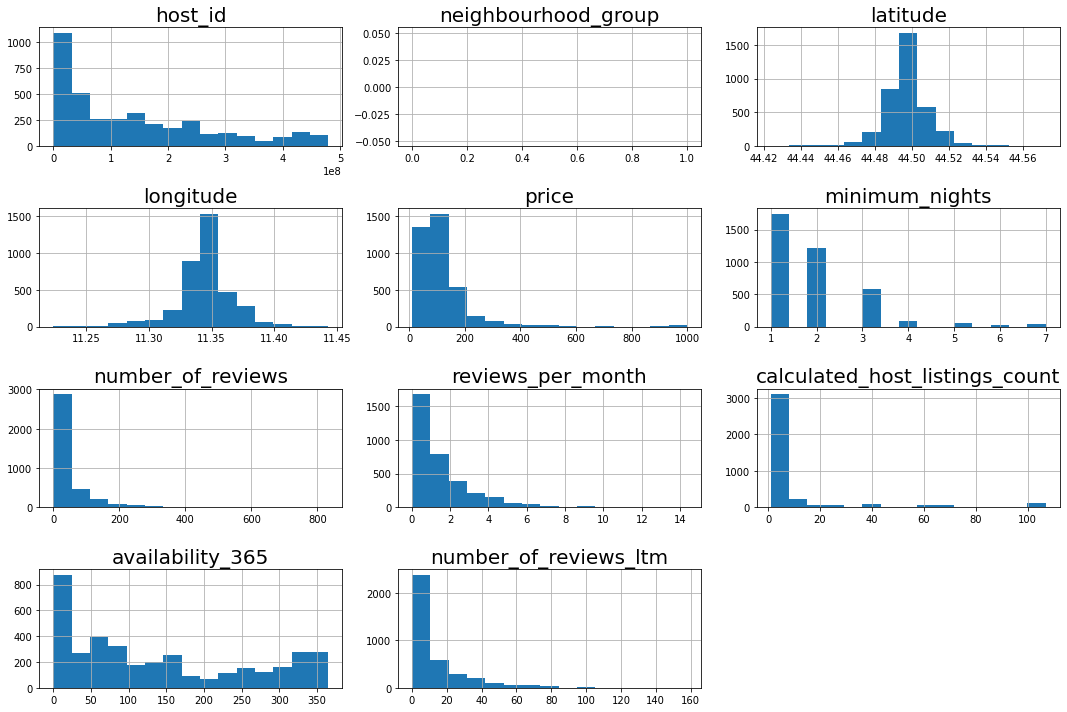

In [85]:
# Gerando um novo DataFrame a partir do arquivo original e gerando novos histogramas
df_new = df.copy()
df_new.drop(df_new[df_new.price > 1000].index, axis = 0, inplace = True)
df_new.drop(df_new[df_new.minimum_nights > 7].index, axis = 0, inplace = True)
df_new.hist(bins= 15, figsize=(15,10));

É possível notar nos novos histogramas de *price* e *minimum_nigths* uma melhor distribuição dos dados, embora ainda deslocada para a esquerda. Esse comportamento é esperado dado que presumi-se que seja menor a quantidade de imóveis com valores altos para preços e número mínimo de noites.

### **Q5. Qual a média dos preços de aluguel?**

In [86]:
# Calculando a média dos preços sem outliers
print("Média de preços com outliers:\t {}".format(df.price.mean()))
print("Média de preços sem outliers:\t {}".format(df_new.price.mean()))

Média de preços com outliers:	 152.09191270860077
Média de preços sem outliers:	 118.81019378816033


In [87]:
df_new.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.767000e+03,0.0,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3382.000000,3767.000000,3767.000000,3767.000000
mean,1.384893e+08,NaN,44.497049,11.344657,118.810194,1.870719,45.008495,1.516026,9.264932,138.327316,13.117069
std,1.328652e+08,NaN,0.013087,0.023235,106.350625,1.117385,76.543941,1.689525,20.986830,121.465032,18.862750
min,3.846800e+04,NaN,44.423600,11.223420,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.510260e+07,NaN,44.491330,11.336775,65.000000,1.000000,4.000000,0.360000,1.000000,31.000000,0.000000
50%,9.780398e+07,NaN,44.496670,11.345110,92.000000,2.000000,17.000000,0.980000,2.000000,100.000000,5.000000
75%,2.255164e+08,NaN,44.502670,11.354285,138.000000,2.000000,51.000000,2.000000,5.000000,255.000000,18.000000
max,4.792220e+08,NaN,44.572280,11.443290,1000.000000,7.000000,833.000000,14.360000,107.000000,365.000000,158.000000


### **Q6. Qual a correlação existente entre as variáveis**

In [88]:
# Criando uma matriz de correlação
corr = df_new[['latitude',	'longitude',	'price',	'minimum_nights',	'number_of_reviews',
               'number_of_reviews_ltm']].corr()
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm
latitude,1.000000,-0.160524,0.013609,-0.042187,-0.005079,0.009075
longitude,-0.160524,1.000000,0.012492,-0.012392,-0.027146,-0.020769
price,0.013609,0.012492,1.000000,-0.060104,-0.123255,-0.112308
minimum_nights,-0.042187,-0.012392,-0.060104,1.000000,-0.034057,-0.096490
number_of_reviews,-0.005079,-0.027146,-0.123255,-0.034057,1.000000,0.671302
number_of_reviews_ltm,0.009075,-0.020769,-0.112308,-0.096490,0.671302,1.000000


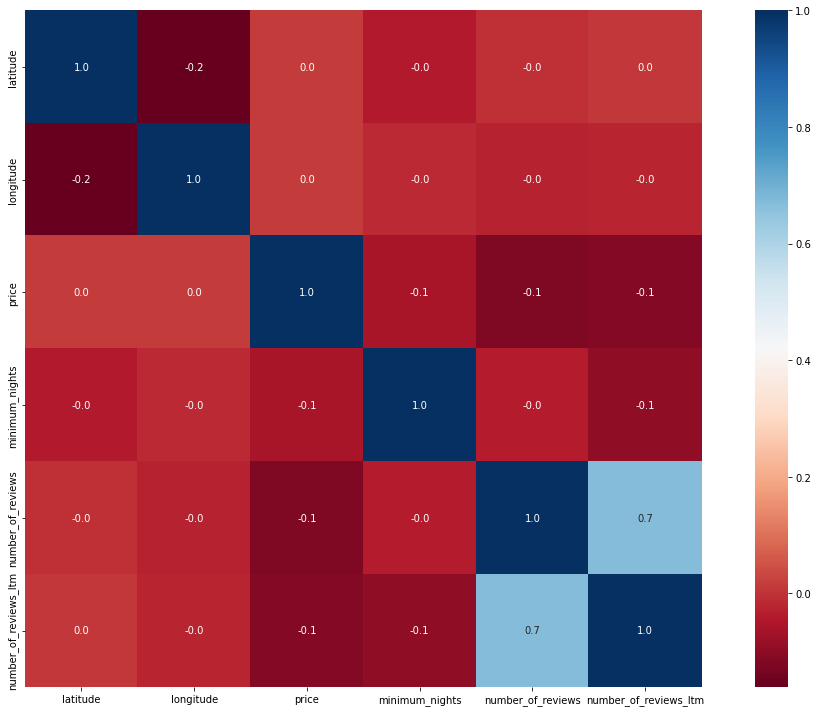

In [89]:
# Plotando heatmap a partir das correlações
sns.heatmap(corr, cmap = "RdBu", fmt = ".1f", square = True, linecolor = "white", annot = True);

#### **Não foi identifica correlação forte entre as variáveis analisadas.**

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável *room_type* mostra os tipos de imóveis/acomodações oferecidas. Vamos listá-las e extrair a quantidade absoluta e o percentual por tipo.

In [90]:
# Mostrar a quantidade de cada tipo de imóvel disponível
df_new.room_type.value_counts()

Entire home/apt    2708
Private room        991
Hotel room           39
Shared room          29
Name: room_type, dtype: int64

In [91]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
df_new.room_type.value_counts()/df_new.shape[0]

Entire home/apt    0.718874
Private room       0.263074
Hotel room         0.010353
Shared room        0.007698
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**



In [92]:
# Ver média de preços por bairro
df_new.groupby("neighbourhood").agg({"price" : "mean"})

,price
neighbourhood,
Borgo Panigale - Reno,91.240437
Navile,111.668950
Porto - Saragozza,123.001614
San Donato - San Vitale,113.188841
Santo Stefano,128.753145
Savena,77.106509


In [93]:
# Obter a quantidade de imóveis por bairro
df_new.neighbourhood.value_counts()

Santo Stefano              1272
Porto - Saragozza          1239
San Donato - San Vitale     466
Navile                      438
Borgo Panigale - Reno       183
Savena                      169
Name: neighbourhood, dtype: int64

In [111]:
# Plotando mapa de calor com referência aos preços dos imóveis para locação
heatmap_data = {'price': df_new.price, 'latitude': df_new.latitude, 'longitude' : df_new.longitude} 
df_plot = pd.DataFrame(data=heatmap_data)
locations = df_plot[['latitude', 'longitude']] 
weights = df_plot['price'] 
fig = gmaps.figure() 
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [97]:
# Obtendo a média de noite mínimas para locação ("minimum_nights").
print("Média de noites mínimas para locação:\t {}".format(df_new.minimum_nights.mean()))

Média de noites mínimas para locação:	 1.8707194053623573


## Conclusões


A maioria dos imóvies ofertados pelo Airbnb em Bolonha (mais de 70%) é do tipo casa ou apartamento. Isto significa que há grande oferta de estadias que oferecem mais **privacidade e independência para o hóspede**.

Analisando o valor de locação, após correção do DataFrame com exclusão de outliers, foi obtido **valor médio de 118.81 por noite**. Na comparação entre bairros não é percebida grande diferença, princiapalmente dentre os mais caros. A região mais onerosa é a do bairro **Santo Stefano, com média de 128.7**. Este é também o bairro com maior quantidade de imóveis disponíveis, **são 1272 opções**.

Não foi encontrada correlação forte entre as variáveis analisadas. Isto significa que não há um padrão que explique, por exemplo, o comportamento da  variação sistemática de preços em relação à uma localidade ou a um anfitrição.

Em média, para os imóveis disponíveis no Airbnb na cidade de Bolonha, é solicitado o **mínimo de 2 noites** para reserva.

Através do mapa de calor, onde as cores mais quentes indicam preços mais altos, é possível ter a visão da distribuição geográfica dos imóveis e as regiões mais caras, embora, como dito anteriormente, não foi observada grande variação na média de preços por bairro.